In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from itertools import cycle

In [7]:
import pandas as pd
train = pd.read_csv(r'C:\Users\OLUBISI\Documents\GitHub\Data Science Projects\Datasets\diabetes.csv')
train.head() #summary
train.info() #more info on data type and if columns have missing values
train.describe() #find mean, std, min, mac, percentile 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    object 
 2   BloodPressure             768 non-null    object 
 3   SkinThickness             768 non-null    object 
 4   Insulin                   768 non-null    object 
 5   BMI                       768 non-null    object 
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 54.1+ KB


,Pregnancies,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000
mean,3.845052,0.471876,33.240885,0.348958
std,3.369578,0.331329,11.760232,0.476951
min,0.000000,0.078000,21.000000,0.000000
25%,1.000000,0.243750,24.000000,0.000000
50%,3.000000,0.372500,29.000000,0.000000
75%,6.000000,0.626250,41.000000,1.000000
max,17.000000,2.420000,81.000000,1.000000


In [8]:
train.replace('?', np.nan, inplace = True)
train = train.astype(float)

In [9]:
total = train.isnull().sum().sort_values(ascending=False)
percent =(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

                          Total   Percent
Insulin                     371  0.483073
SkinThickness               227  0.295573
BloodPressure                34  0.044271
BMI                          11  0.014323
Glucose                       5  0.006510
Outcome                       0  0.000000
Age                           0  0.000000
DiabetesPedigreeFunction      0  0.000000
Pregnancies                   0  0.000000


In [10]:
mode = pd.Series(train.mode().values[0], index=['Pregnancies', 'Glucose', 'BloodPressure',
'SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'])
median = train.median()
mean = train.mean()
max = train.max()
min = train.min()
skewness = pd.concat([mode, median, mean, max, min], axis=1, keys=['mode','median','mean','max','min'])
skewness 
skewness[skewness.index.isin(['Insulin','SkinThickness','BloodPressure','BMI','Glucose'])]
print(skewness)

                             mode    median        mean     max     min
Pregnancies                 1.000    3.0000    3.845052   17.00   0.000
Glucose                    99.000  117.0000  121.686763  199.00  44.000
BloodPressure              70.000   72.0000   72.306540  122.00   0.000
SkinThickness              32.000   29.0000   29.153420   99.00   7.000
Insulin                   105.000  125.0000  154.372796  846.00   0.000
BMI                        32.000   32.3000   32.457464   67.10  18.200
DiabetesPedigreeFunction    0.254    0.3725    0.471876    2.42   0.078
Age                        22.000   29.0000   33.240885   81.00  21.000
Outcome                     0.000    0.0000    0.348958    1.00   0.000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020716F98DC8>,
      dtype=object)

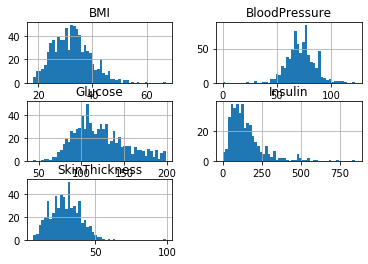

In [11]:
# Histogram
missing_value_analysis = pd.concat([train['Insulin'],train['SkinThickness'],train['BloodPressure'],train['BMI'],train['Glucose']]
 , axis=1, keys=['Insulin', 'SkinThickness','BloodPressure','BMI','Glucose'])
missing_value_analysis.hist(bins=50)

In [12]:
# handle the missing data by applying central measure of tendency
train['BMI'] = train['BMI'].fillna(train['BMI'].median())
train['BloodPressure'] = train['BloodPressure'].fillna(train['BloodPressure'].mean())
train['Glucose'] = train['Glucose'].fillna(train['Glucose'].median())
train['Insulin'] = train['Insulin'].fillna(train['Insulin'].median())
train['SkinThickness'] = train['SkinThickness'].fillna(train['SkinThickness'].mean())

In [13]:
#z-score normalization
X = train
Y = train.pop('Outcome')
X = (train-train.mean())/(train.std())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002071867C408>,
      dtype=object)

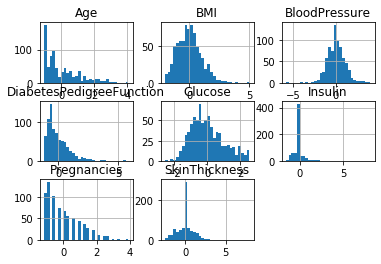

In [14]:
#train-test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
X.hist(bins=30)

In [15]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', learning_rate_init=0.001, batch_size=10,
hidden_layer_sizes=(1), random_state=1)
clf.fit(X_train, Y_train)

#Plot the Neural Network. 
print(clf.coefs_)

[array([[-0.40587393],
       [-1.96528565],
       [ 0.37590195],
       [-0.16669167],
       [-0.12229255],
       [-0.84183498],
       [-0.52068092],
       [-1.19051153]]), array([[-1.00897402]])]


In [16]:
#To estimate the model's performance, generate predictions on the test dataset.
prediction = clf.predict(X_test)
acc = sum(prediction==Y_test)/len(Y_test)
print("Accuracy for MLP: "+str(acc))

# Confusion matrix for the model.
print(confusion_matrix(Y_test, prediction))
y_score = clf.predict_proba(X_test)[:,1]

#Compute ROC curve and ROC area for each class
fprs = []
tprs = []
roc_aucs = []
fpr, tpr, _ = roc_curve(Y_test, y_score)
roc_auc = auc(fpr, tpr)
fprs.append(fpr)
tprs.append(tpr)
roc_aucs.append(roc_auc)

Accuracy for MLP: 0.6979166666666666
[[85 38]
 [20 49]]


In [17]:
# SVM
clf = svm.SVC()
clf.fit(X_train, Y_train)
prediction = clf.predict(X_test)
acc = sum(prediction==Y_test)/len(Y_test)
print("Accuracy for SVM: "+str(acc))
y_score = clf.fit(X_train, Y_train).decision_function(X_test)

Accuracy for SVM: 0.734375


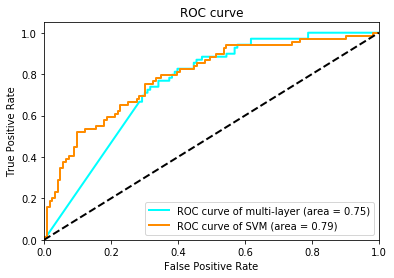

In [18]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(Y_test, y_score)
roc_auc = auc(fpr, tpr)
fprs.append(fpr)
tprs.append(tpr)
tprs.append(tpr)
roc_aucs.append(roc_auc)
plt.figure()
lw = 2
colors = cycle(['aqua', 'darkorange'])
labels = ['multi-layer', 'SVM']
for i, color in zip(range(2), colors):
 plt.plot(fprs[i], tprs[i], color=color, lw=lw,
 label='ROC curve of '+labels[i]+' (area = {1:0.2f})'
 ''.format(i, roc_aucs[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()